In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

'%.3f'

In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


- https://www.kaggle.com/datasets/shivam2503/diamonds

- price : 우리가 예측해야할 수치, 즉 가격.(기준 : 미국 달러)
- carat : 다이아몬드의 무게를 의미.
- cut : 컷팅 품질을 의미합니다(Fair, Good, Very Good, Premium, Ideal 순으로 좋다)
- color : 다이아몬드 색깔을 의미. (J부터 시작해서 D까지, D로 갈수록 좋다.)
- clarity : 다이아몬드의 선명도를 의미. (I1(worst) ~ IF(best)로 구성되어있다.)
- x : 다이아몬드의 길이(mm)
- y : 다이아몬드의 넓이(mm)
- z : 다이아몬드의 깊이(mm)
- depth : 전체 깊이 퍼센티지를 의미. (z / mean(x, y))
- table : 가장 넓은 부분 기준으로 다이아몬드의 상단부분의 넓이를 의미
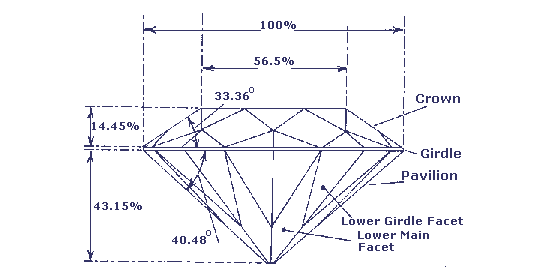

이미지 출처[https://lsk.pe.kr/3373]

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../ML_DATA/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 0, 'carat')

Text(0, 0.5, 'count')

<AxesSubplot:xlabel='carat', ylabel='count'>

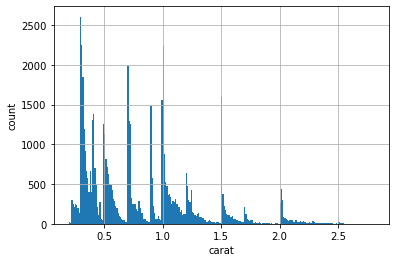

<AxesSubplot:xlabel='carat', ylabel='price'>

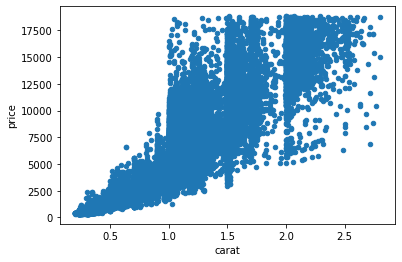

<AxesSubplot:xlabel='cut', ylabel='price'>

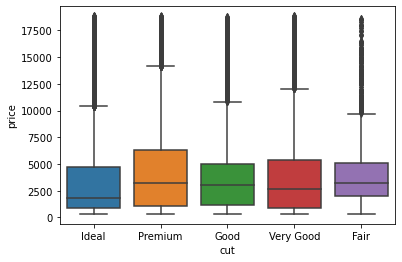

In [60]:

df_carat_lt3 = df[df['carat'] < 3]


plt.xlabel('carat')
plt.ylabel('count')


df_carat_lt3['carat'].hist(bins=250)
plt.show()


df_carat_lt3.plot.scatter(x = 'carat', y = 'price')
plt.show()

sns.boxplot(x = 'cut', y = 'price', data = df_carat_lt3)
plt.show()
# carat 이 커지면 가격이 커진다, carat 이 커질수록 나쁜 품질도 증가한다
# 품질의 순서는 ideal > preminum > very good > good > Fair'
#

<AxesSubplot:xlabel='cut', ylabel='carat'>

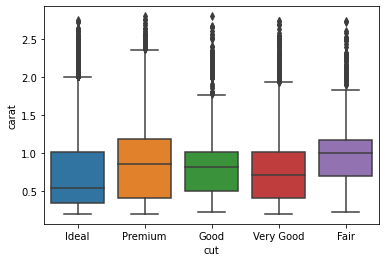

In [61]:
sns.boxplot(x = 'cut', y = 'carat', data = df_carat_lt3)
plt.show()
# 중앙값을 확인해서 컷의 질이 제일 높은 캐럿 수를 확인 , 판단할 수 있다
# ideal fair 확인

# 품질 측정 방법
# 1) 절단의 품질이 높을수록 캐럿당 비용증가
# 2) 큰 다이아몬드 원석은 더 나은 대칭 및 비율을 달성하기 위한 더 많은 데이터가 필요하다
# 낭비에 측정

In [62]:
#1. 기본함수 -> 분류 X
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

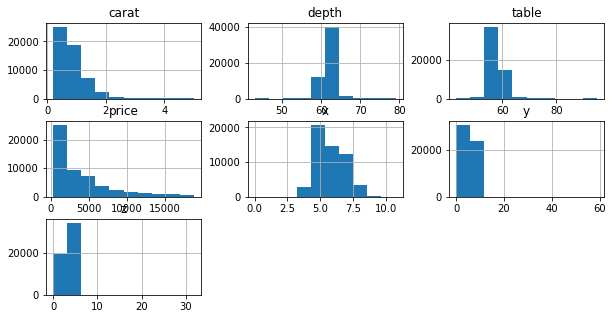

In [63]:
#2. hist 그리기 연속데이터 분포 확인 _ 데이터 불균형 확인
df.hist(bins=10, figsize=(10,5))

<AxesSubplot:xlabel='color', ylabel='count'>

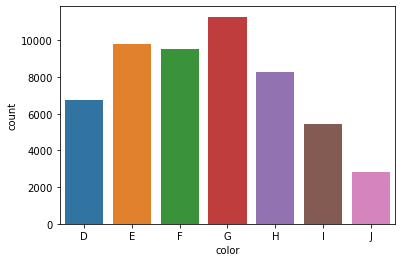

In [64]:
sns.countplot(x='color', data=df, order="DEFGHIJ")
plt.show() # D로 갈수록 좋다 , 판단 : 데이터 개수가 불균형하다

<AxesSubplot:xlabel='cut', ylabel='count'>

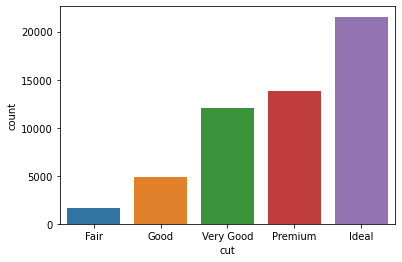

In [65]:
# cut의 데이터 분포를 확인 = Categorical Data = countplot

# Fair, Good, Very Good, Premium, Ideal
sns.countplot(x='cut', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='count'>

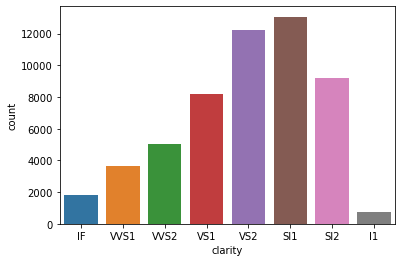

In [66]:
# I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

c_list = {0:"IF",1:"VVS1",2:'VVS2',3:"VS1",4:'VS2',5:"SI1",6:"SI2",7:"I1"}
sns.countplot(x="clarity", data =df, order=c_list.values())
plt.show()

널값 , 중복제거 -> 이상치 제거 -> one hot encoding -> 상관도가 높은 feature만 추출

In [67]:
df_unique = df.drop_duplicates() #53940 -> 53794
df_unique

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:>

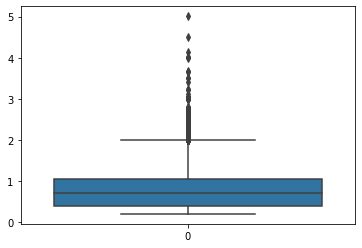

In [68]:
# 이상치 제거하지 전에 반드시 확인
sns.boxplot(data = df_unique['carat'])
plt.show()

Text(0.5, 0, 'carat')

Text(0, 0.5, 'price')

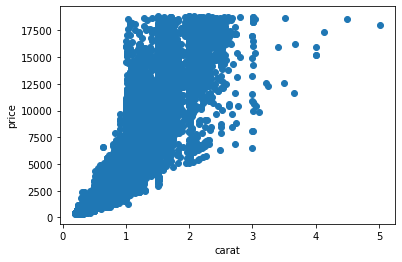

In [69]:
# q1 ) carat 과 price만 추출해서 scatterplot 추출
# df_unique[['carat', 'price']]
plt.scatter(df_unique['carat'],df_unique['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [70]:
# q2 ) carat 과 price에 대한 상관계수와 p-value값 corr()
res_corr = df[['carat','price']].corr().iloc[0,1]
res_corr

0.922

<AxesSubplot:xlabel='color', ylabel='price'>

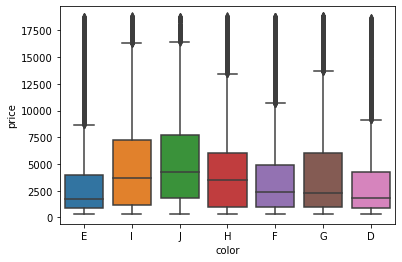

In [71]:
# q3) color에 따른  price에 값의 분포를 확인 
sns.boxplot(data = df, x='color', y='price')

In [80]:
# q4) 다이아몬드의 평균 price = 3,932 
# 'H'가 가진 다이아몬드 집단의 평균에 대한 일표본 t를 구하려고 한다 (t검정)
# 통계량와 pvalue를 구해보자 
# 유의 수준 0.05 에서 귀무가설 채택 여부를 boolearn값으로 표현
# 변수 (hres)를 만들자
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

# 4-1 H_color 를 df로 
H_color = df[df['color']=='H']
# H_color

# 4-2 3,932로 일표본 추출
statistic, pvalue = ttest_1samp(H_color['price'], 3932)
print(statistic)
print(pvalue)

# 4-3
if pvalue <0.05:
    hres = False
else:
    hres = True

hres # 선택 안함

11.988997411117696
7.569973305218302e-33


False

In [88]:
# q5) bike 데이터를 사용해서 기온, 체감온도 , 상대온도, 총 자전거 대여 숫자 상관관계를  분석했을 때 가장 낮은 상관관계
df = pd.read_csv('../../ML_DATA/bike.csv')
df[['temp','atemp','humidity','count']].corr('pearson').min()

temp       -0.064949
atemp      -0.043536
humidity   -0.317371
count      -0.317371
dtype: float64

In [100]:
# q6) 계절별 체감온도와 자전거 대여 숫자의 상관관계
#    각 계절 별 상관계수
df[['season','atemp','count']].groupby('season').corr()

atemp     count
season                          
1      atemp  1.000000  0.438951
       count  0.438951  1.000000
2      atemp  1.000000  0.400897
       count  0.400897  1.000000
3      atemp  1.000000  0.313750
       count  0.313750  1.000000
4      atemp  1.000000  0.320340
       count  0.320340  1.000000

### 상관 분석
- 두변수 간의 선형 관계를 확인 하기 위한 상관 분석을 실시한다.
- 상관 계수가 0 에 가까울 수록 선형관계가 약하며 절대 값이 1에 가까울 수록 선형관계가 강하다.
- pandas -corr() pearson, kendall, spearman 속성으로 상관계수로 계산
- scipy
    - pearsonr() Pearson 상관분석 : 입력은 두 일차원 벡터에 넣고 출력은 상관계수와 p-value 출력
        - **선형의 관게 측정** 두 변수가 동시에 일정한 비율로 증가하거나 감소하는 것을 두고 양의 선형 관계가 존재
      
    - spearman() : 입력은 두 일차원 벡터에 넣고 출력은 상관계수와 p-value 출력
        - Spearman rank-order correlation coefficient : 한 변수의 값의 크기가 커지거나 작아지면 다른 변수의 크기도 커지고 작아지는 것을 확인
      
    - kendall() : 입력은 두 일차원 벡터에 넣고 출력은 상관계수와 p-value 출력
        - Kendall rank-order correlation coefficient : spearman와 같은 것을 확인 , 단 일치하는 값들을 쌍으로 표현하며 1에 가까울 수록 **일치하는 값**들이 많다고 판단
    

### scipy corr
[scipy.stats.mstats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_1samp.html)  
[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)  
[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)  

### OLS 회귀분석 (statsmodels)  
-  전처리한 자료에 회귀분석을 적용해 변수별 회귀계수를 구할 수 있다. 
-  python에서 다양한 통계 분석을 할 수 있도록 기능을 제공

- 다중회귀 공식
$$
y_{i} = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} \cdots \beta_{n} x_{n} + \epsilon_{i}
$$